First few rows:
   Study_Hours  Sleep_Hours  Exam_Score
0     5.993428     4.876944   41.509966
1     4.723471     6.369032   39.159344
2     6.295377     6.485928   49.863998
3     8.046060     5.796584   57.092477
4     4.531693     6.758071   29.286262

Descriptive stats:
       Study_Hours  Sleep_Hours  Exam_Score
count   100.000000   100.000000  100.000000
mean      4.794702     7.033457   38.364904
std       1.809781     1.430503   11.398171
min       0.000000     4.121843    9.922529
25%       3.798189     5.791509   30.314422
50%       4.746087     7.126161   39.183190
75%       5.811904     7.807256   44.817871
max       8.704556    11.080254   67.602876


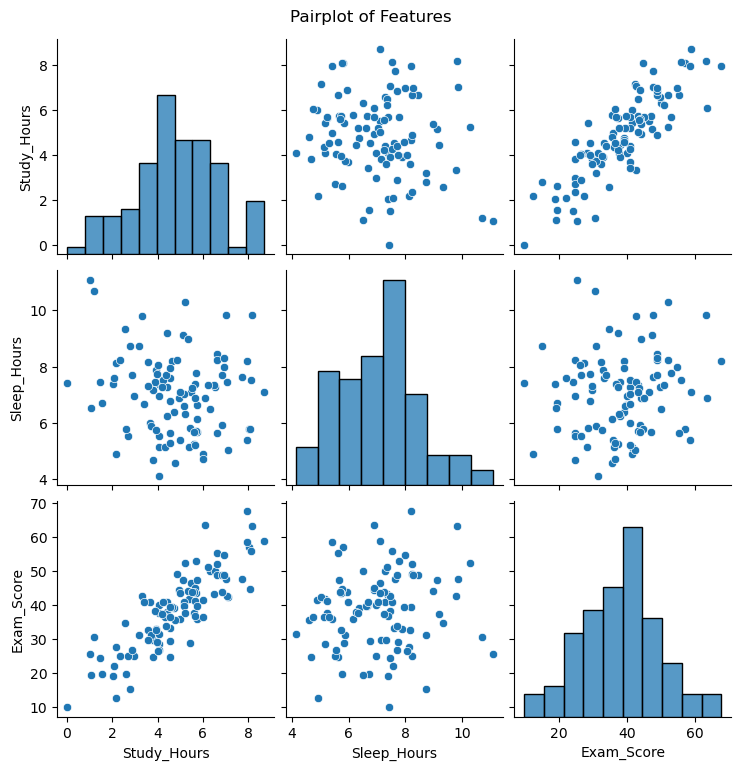

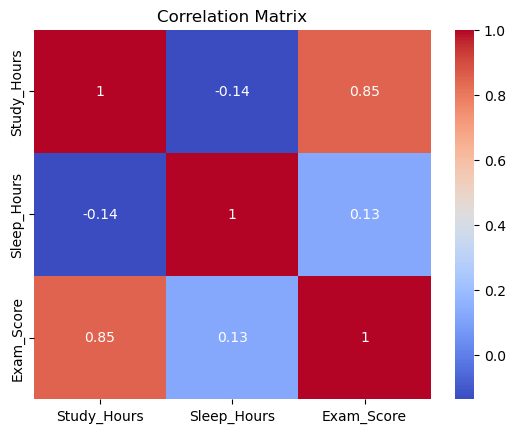


Model Coefficients:
Intercept: -2.34
Study_Hours Coefficient: 5.45
Sleep_Hours Coefficient: 2.09

Model Evaluation:
R² Score: 0.872
MAE: 3.13
RMSE: 3.69


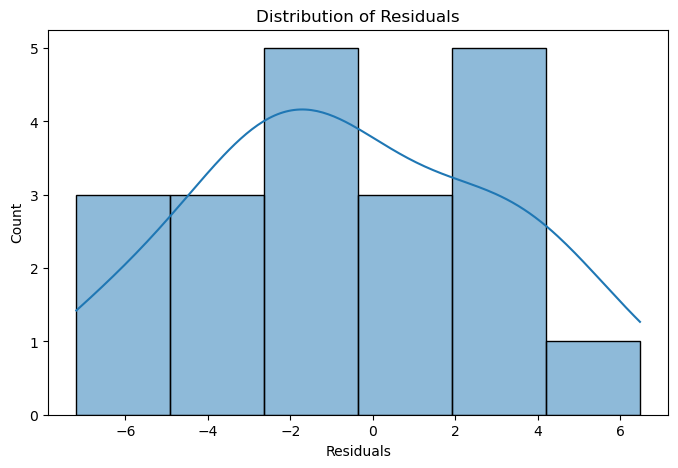

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 2: Generate Synthetic Data
np.random.seed(42)
num_students = 100

study_hours = np.random.normal(5, 2, num_students).clip(0)  # average 5 hours
sleep_hours = np.random.normal(7, 1.5, num_students).clip(0)  # average 7 hours

# Exam score = 5*study_hours + 2*sleep_hours + noise
noise = np.random.normal(0, 5, num_students)
exam_scores = (5 * study_hours) + (2 * sleep_hours) + noise

# Create DataFrame
df = pd.DataFrame({
    'Study_Hours': study_hours,
    'Sleep_Hours': sleep_hours,
    'Exam_Score': exam_scores
})

# Step 3: Explore the Data
print("First few rows:")
print(df.head())

print("\nDescriptive stats:")
print(df.describe())

# Step 4: Visualize Relationships
sns.pairplot(df)
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 5: Prepare Data for Modeling
X = df[['Study_Hours', 'Sleep_Hours']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Study_Hours Coefficient: {model.coef_[0]:.2f}")
print(f"Sleep_Hours Coefficient: {model.coef_[1]:.2f}")

print("\nModel Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Optional: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()
